## Hierarchical clustering using SKlearn :

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

data = pd.read_csv("C:/Users/Vaishnav/OneDrive/Desktop/Datasets/income.csv")
df = pd.DataFrame(data)
print(df.columns)



Index(['Name', 'Age', 'Income($)'], dtype='object')


In [6]:
df.sample(5)

,Name,Age,Income($)
16,Dipika,40,65000
2,Mohan,29,61000
7,Andrea,38,162000
19,Alia,39,80000
4,Kory,42,150000


<Axes: xlabel='Age', ylabel='Income($)'>

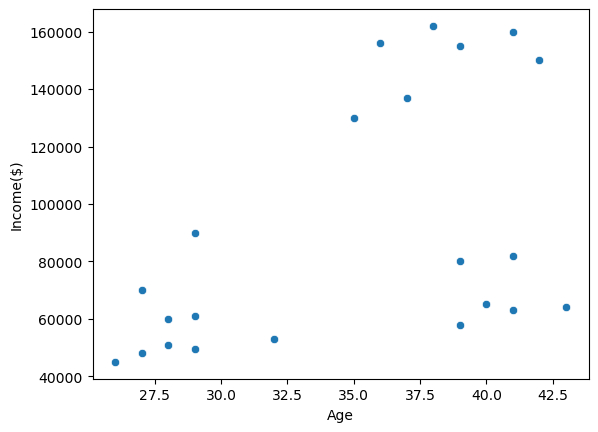

In [14]:
import seaborn as sns
sns.scatterplot(data=df,x="Age",y="Income($)")

In [20]:
ac = AgglomerativeClustering(n_clusters=3,linkage="ward")
ac.fit(df[["Age","Income($)"]])
ac.labels_


array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int64)

In [22]:
df["cluster"] = ac.labels_

In [26]:
df.head(6)

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0


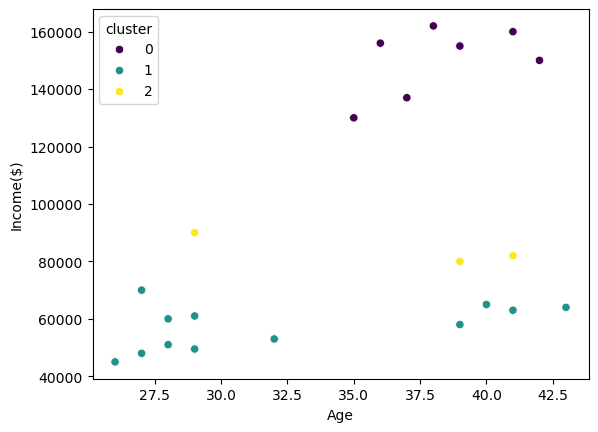

In [32]:
import seaborn as sns
sns.scatterplot(data=df,x="Age",y="Income($)",palette="viridis",hue=df["cluster"])
plt.show()

In [34]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


## Hierarchical Clustering using Scipy :

### Linkage : 
computes clusters

In [38]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

z = linkage(df[["Age","Income($)"]],method="ward")
z

array([[2.00000000e+00, 3.00000000e+00, 1.00000050e+03, 2.00000000e+00],
       [1.70000000e+01, 1.80000000e+01, 1.00000200e+03, 2.00000000e+00],
       [5.00000000e+00, 8.00000000e+00, 1.00000450e+03, 2.00000000e+00],
       [1.30000000e+01, 1.40000000e+01, 1.50000033e+03, 2.00000000e+00],
       [1.60000000e+01, 2.30000000e+01, 1.73205235e+03, 3.00000000e+00],
       [1.90000000e+01, 2.00000000e+01, 2.00000100e+03, 2.00000000e+00],
       [6.00000000e+00, 7.00000000e+00, 2.00000225e+03, 2.00000000e+00],
       [1.20000000e+01, 2.50000000e+01, 2.59807679e+03, 3.00000000e+00],
       [2.10000000e+01, 2.20000000e+01, 2.88677681e+03, 3.00000000e+00],
       [1.50000000e+01, 2.90000000e+01, 4.28660985e+03, 4.00000000e+00],
       [4.00000000e+00, 2.40000000e+01, 6.35085509e+03, 3.00000000e+00],
       [1.10000000e+01, 3.10000000e+01, 6.79889803e+03, 5.00000000e+00],
       [9.00000000e+00, 1.00000000e+01, 7.00000029e+03, 2.00000000e+00],
       [0.00000000e+00, 2.60000000e+01, 7.34849020e

### Dendrogram :
visualization of clusters 

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [10.0, 10.0, 41.25, 41.25],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [105.0, 105.0, 123.75, 123.75],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [162.5, 162.5, 193.75, 193.75],
  [114.375, 114.375, 178.125, 178.125],
  [82.5, 82.5, 146.25, 146.25],
  [25.625, 25.625, 114.375, 114.375]],
 'dcoord': [[0.0, 7000.00028571428, 7000.00028571428, 0.0],
  [0.0, 2000.0022499987344, 2000.0022499987344, 0.0],
  [0.0, 1000.0044999898751, 1000.0044999898751, 0.0],
  [0.0, 6350.855086784246, 6350.855086784246, 1000.0044999898751],
  [2000.0022499987344,
   11360.751175281795,
   11360.751175281795,
   6350.855086784246],
  [7

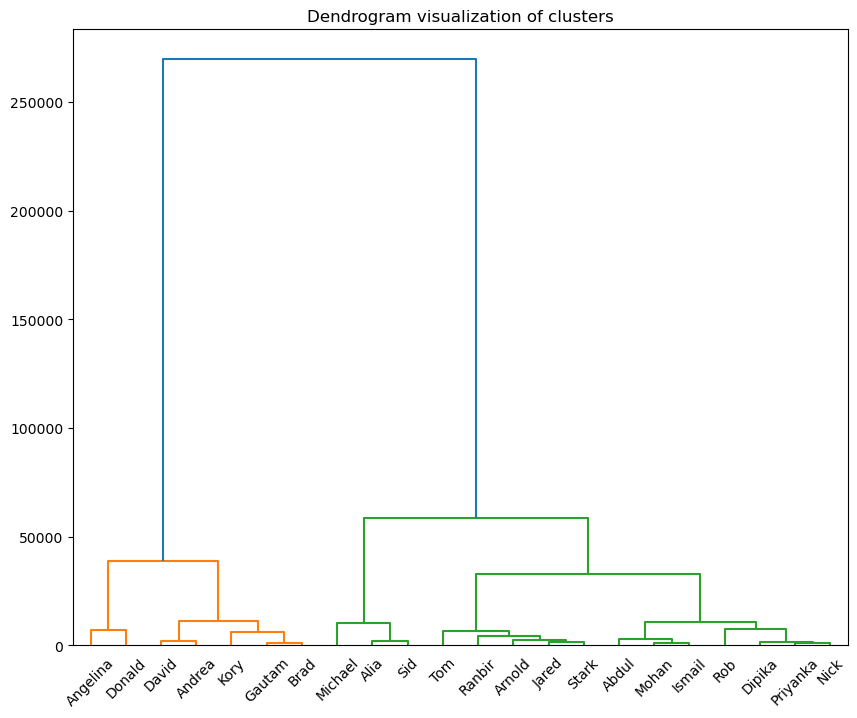

In [53]:
plt.figure(figsize=(10,8))
plt.title("Dendrogram visualization of clusters")
dendrogram(z,labels=df["Name"].values)

### Fcluster : 
returns the clusters labels

In [58]:
fcluster(z,t=3,criterion="maxclust")

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [72]:
df["fcluster"] = fcluster(z,t=3,criterion="maxclust")

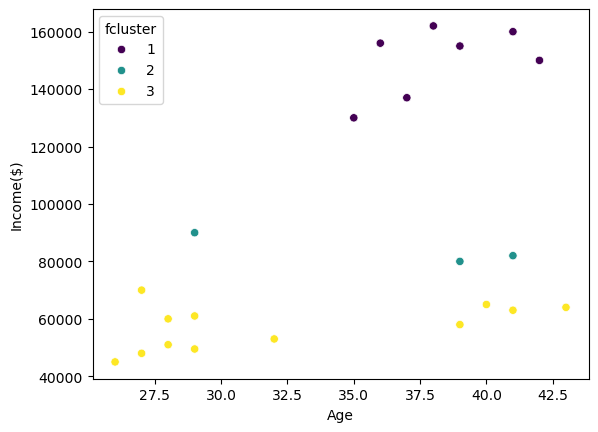

In [74]:
import seaborn as sns
sns.scatterplot(data=df,x="Age",y="Income($)",palette="viridis",hue=df["fcluster"])
plt.show()